# Import potrebnih biblioteka i učitavanje podataka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

# Analiza dataseta

In [3]:
data.head()

,slovo,a,b,c,d,e,f
0,C,5.86,11.59,75.54,50.87,11.72,5.578
1,B,5.54,56.06,36.59,76.01,11.08,32.450
2,C,70.21,69.10,47.9,79.92,140.42,7.589
3,C,87.02,56.71,54.21,6.22,174.04,6.210
4,B,25.19,41.91,31.14,100.81,50.38,8.810


In [4]:
data.tail()

,slovo,a,b,c,d,e,f
9995,A,5.86,85.91,63.15,22.69,11.72,5.860
9996,B,80.16,98.09,69.2,60.94,160.32,8.322
9997,A,32.30,54.55,40,213213116.3,64.6,32.300
9998,A,39.20,28.94,22.67,94.28,78.4,39.200
9999,A,11.80,38.51,2.15,82.47,23.6,11.800


In [5]:
data.shape

(10000, 7)

Pomoću funkcija head() i tail() možemo vidjeti da se radi o datasetu sa kolonom 'slovo' koja ima vrijednosti A, B i C, te kolonama a, b, c, d, e i f koje imaju brojčane vrijednosti. Dataset ima 10000 redova i 7 kolona.

In [6]:
data['slovo'].unique()

array(['C', 'B', 'A', nan, 'F'], dtype=object)

In [7]:
data['slovo'].value_counts()

B    3358
C    3335
A    3302
F       1
Name: slovo, dtype: int64

In [8]:
data['slovo'].isna().sum()

4

Vidimo da u koloni slovo imamo četiri jedinstvne vrijednosti, dakle pored A,B i C postoji još jedna vrijednost. Ta vrijednost je F i pojavljuje se samo jednom. Također, u koloni postoje četiri polja sa NaN, te brišemo iz dataseta F i NaN. NaN je zapravo prazan string.

In [9]:
data.drop(data.index[data['slovo'] == 'F'], inplace=True)
data.dropna(subset=['slovo'], inplace=True)

In [10]:
data.dtypes

slovo     object
 a       float64
 b       float64
 c        object
 d        object
 e        object
 f       float64
dtype: object

Vrijedosti u kolonama c, d i e nisu numeričke vrijednosti, pa ih je potrebno pretvoriti.

In [11]:
(data[' c'].values ==  ' ').sum()

1

In [12]:
(data[' d'].values == ' ').sum()

4

In [13]:
(data[' e'].values == ' ').sum()

1

Provjeravamo da li ima praznih stringova u kolonama c, d i e. Pošto ima praznih stringova, mijenjam ih sa nan i kolone pretvaramo u numeričke vrijednosti.

In [14]:
data = data.replace(' ', np.nan)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data[' c'] = pd.to_numeric(data[' c'])
data[' d'] = pd.to_numeric(data[' d'])
data[' e'] = pd.to_numeric(data[' e'])
data.dtypes

slovo     object
 a       float64
 b       float64
 c       float64
 d       float64
 e       float64
 f       float64
dtype: object

Sada su sve kolone, osim kolone slovo, tipa float.

In [15]:
data.describe(include = 'all')

,slovo,a,b,c,d,e,f
count,9995,9995.000,9995.000,9994.000,9991.000,9994.000,9992.000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN
freq,3358,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,50.298,51.444,51.114,21391.671,100.611,365.837
std,NaN,28.808,28.980,28.718,2133090.759,57.579,24626.205
min,NaN,-52.010,-44.050,1.010,1.010,2.020,1.010
25%,NaN,25.365,26.300,26.712,26.125,50.745,6.128
50%,NaN,49.980,52.150,50.700,51.600,99.970,10.503
75%,NaN,74.930,76.530,76.130,76.170,149.855,37.981


## Korelacija podatka

In [16]:
data.corr()

,a,b,c,d,e,f
a,1.000,0.019,-0.011,-0.006,0.999,0.007
b,0.019,1.000,-0.010,0.001,0.020,0.002
c,-0.011,-0.010,1.000,-0.004,-0.011,-0.001
d,-0.006,0.001,-0.004,1.000,-0.006,-0.000
e,0.999,0.020,-0.011,-0.006,1.000,0.007
f,0.007,0.002,-0.001,-0.000,0.007,1.000


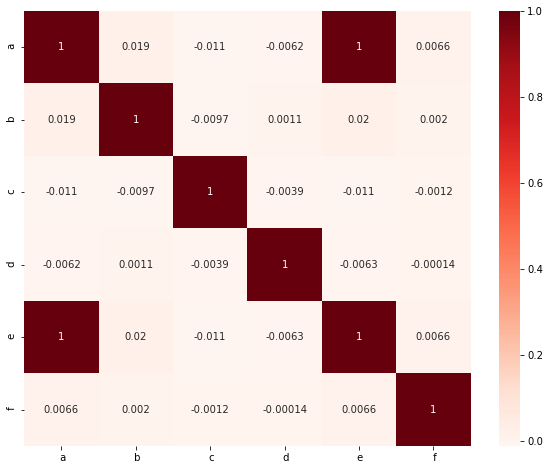

In [17]:
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Sa slike se vidi da za kolone a i e koeficijent korelacije jednak 1. To znači da sa promjenom a (odnosno e) mijenja se e (odnosno a). Brišemo jednu od ovih kolona.

In [18]:
data = data.drop(data[[' e']], axis=1)
data.corr()

,a,b,c,d,f
a,1.000,0.019,-0.011,-0.006,0.007
b,0.019,1.000,-0.010,0.001,0.002
c,-0.011,-0.010,1.000,-0.004,-0.001
d,-0.006,0.001,-0.004,1.000,-0.000
f,0.007,0.002,-0.001,-0.000,1.000


## Anomalije

Na sljedećim slikama se vidi da za kolonu a imamo anomaliju tj. vrijednos koja je manja od -40, te za kolonu d imamo vrijednost koja je mnogo veća od ostalih vrijednosti u koloni.

<AxesSubplot:>

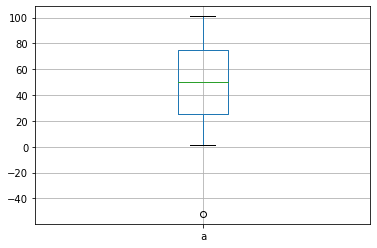

In [19]:
data.boxplot(column=' a')

<AxesSubplot:>

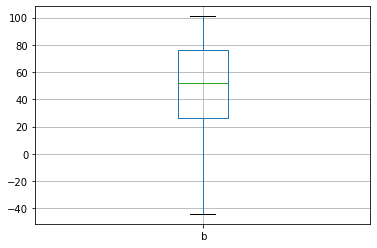

In [20]:
data.boxplot(column=' b')

<AxesSubplot:>

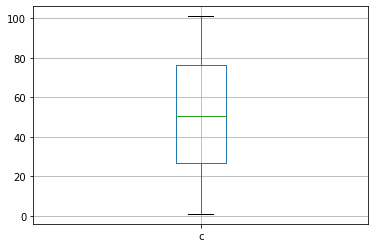

In [21]:
data.boxplot(column=' c')

<AxesSubplot:>

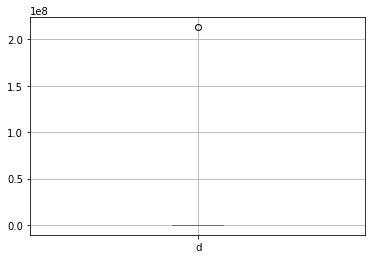

In [22]:
data.boxplot(column=' d')

Za detekciju anomalija se radi pomoću kvantila jer se sa njima mogu pronaći vrijednosti koji su iznad gornje ili ispod donje granice.

In [23]:
def anomalije(data, kolona):
    Q1 = data[kolona].quantile(0.25)
    Q3 = data[kolona].quantile(0.75)
    IQR = Q3 - Q1
    donja_granica = Q1 - 1.5 * IQR
    gornja_granica = Q3 + 1.5 * IQR
    lista = data.index[(data[kolona] < donja_granica) | (data[kolona] > gornja_granica)]
    return lista

Zatim pravimo lista_indeksa i na nju, pomoću funkcije anomalije, nadodajemo indekse za svaku kolonu gdje se pronađe anomalija. Iz data brišemo anomalije.

In [24]:
lista_indeksa = []
for kol in [' a', ' b', ' c', ' d']:
    lista_indeksa.extend(anomalije(data, kol))
lista_indeksa

[9967, 9997]

In [25]:
data = data.drop(lista_indeksa)

Pošto su se iz data brisali redovi, potrebno je resetovati indekse. Sa funckijom reset_index() se doda nova kolona u data sa nazivom index koja sadrži stare indekse. Pošto oni više nisu potrebni, briše se ta kolona iz data.

In [26]:
data = data.reset_index()
data = data.drop(data[['index']], axis=1)
data

,slovo,a,b,c,d,f
0,C,5.860,11.590,75.540,50.870,5.578
1,B,5.540,56.060,36.590,76.010,32.450
2,C,70.210,69.100,47.900,79.920,7.589
3,C,87.020,56.710,54.210,6.220,6.210
4,B,25.190,41.910,31.140,100.810,8.810
...,...,...,...,...,...,...
9988,C,78.080,88.370,33.490,73.080,10.635
9989,A,5.860,85.910,63.150,22.690,5.860
9990,B,80.160,98.090,69.200,60.940,8.322
9991,A,39.200,28.940,22.670,94.280,39.200


## Podjela podataka na X i y

Prvih šesto kolona je X, a zadnja kolona je izlaz.

In [27]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Column transformet - OneHotEncoder

Pošto je prva kolona u X sadržana od kategoričkih podataka (A, B i C), sa OneHotEncoder se pretvaraju u brojeve.

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

## Train-test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Dopunjavanje vrijednosti

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_train)
imputer.fit(y_train)
y_train = imputer.transform(y_train)
y_test = imputer.transform(y_train)

### Linearna regresija

In [31]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
predictions1 = regressor1.predict(X_test)
predictions1

array([[ 312.04182592],
       [ 603.56521439],
       [ 357.8296688 ],
       ...,
       [ 223.1608934 ],
       [-198.13891235],
       [-213.72755827]])

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions1)
mse

216881674.02365133

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions1)
mae

492.63938279557294

Linearna regresija očigledno nije dobra opcija jer se dobije prevelika greška.

### Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, y_train)
predictions2 = regressor2.predict(X_test)
predictions2

array([ 5.317,  5.214, 16.11 , ...,  7.39 , 23.295,  6.042])

In [35]:
y_test

array([[ 5.317],
       [ 5.214],
       [16.11 ],
       ...,
       [ 7.39 ],
       [23.295],
       [ 6.042]])

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions2)
mse

0.0

Pošto je greška 0.0, to je ovaj model idealan.

### Random Forest regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=3)
regressor3.fit(X_train,y_test.ravel())
predictions3 = regressor3.predict(X_test)
predictions3

array([ 5.32733333,  5.675     , 16.06      , ...,  7.4       ,
       23.295     ,  6.09166667])

In [41]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions3)
mae

177.73963712175365

Za Random Forest se dobije velika greška.

## Feature scalling

Za algoritme SVR i Lasso Regression je potrebno izvršiti skaliranje podataka.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_train[:, 3:])
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_train)

### SVR - Support Vector Regression

In [ ]:
from sklearn.svm import SVR
regressor4 = SVR().fit(X_train, y_train.ravel())
predictions4 = regressor4.predict(X_test)
predictions4

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions4)
mse

Sa SVR imamo sasvim malu grešku pa je ovaj model sasvim OK.

### Lasso Regression

In [ ]:
from sklearn import linear_model
regressor5 = linear_model.Lasso(alpha=0.1)
regressor5.fit(X_train, y_train)
predictions5 = regressor5.predict(X_test)
predictions5

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions5)
mse

Također, za Lasso je malo greška pa je sasvim OK za korištenje.

## Zaključak
Od svih modela najbolji je Decission Tree Regressor jer za njega dobijemo najmanju grešku.